# NeuroFlow Data Team Take-Home Project

Name: Junaid Asim

### Part 1

In [41]:
#import conventions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Acquire Data

In [42]:
gad7_df = pd.read_csv('phq_all_final.csv')

In [43]:
print(gad7_df.columns.values)
print("_"*50)
gad7_df.info()

['date' 'patient_id' 'type' 'patient_date_created' 'score']
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53698 entries, 0 to 53697
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date                  53698 non-null  object
 1   patient_id            53698 non-null  int64 
 2   type                  53698 non-null  object
 3   patient_date_created  53698 non-null  object
 4   score                 53698 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.0+ MB


#### Understand the meanings and type of data fields
#### Data Dictionary

**Variable Definition Key** <br/>
**date** Time the measurement was made <br/>
**patient_id** ID of the patient submitting the assessment <br/>
**type** The type of assessment submitted <br/>
**patient_date_created** The date patient was created <br/>
**score** Final score of the assessment <br/>

**Data types**

In [44]:
gad7_df.dtypes

date                    object
patient_id               int64
type                    object
patient_date_created    object
score                    int64
dtype: object

**Missing or Duplicate values**

In [45]:
gad7_df.isnull().sum()

date                    0
patient_id              0
type                    0
patient_date_created    0
score                   0
dtype: int64

In [46]:
gad7_df.duplicated().sum()

0

Since there are no missing or duplicate values we do not have to perform any filling or drop of the certain values using different functions such as fillna(), replace() and interpolate().

**Statistics**

In [47]:
gad7_score = gad7_df['score']

In [48]:
gad7_score.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99])

count    53698.000000
mean         4.784592
std          5.246969
min          0.000000
10%          0.000000
20%          0.000000
30%          1.000000
40%          2.000000
50%          3.000000
60%          5.000000
70%          6.000000
80%          9.000000
90%         13.000000
99%         20.000000
max         21.000000
Name: score, dtype: float64

In [49]:
gad7_df.describe(include = ['O'])

,date,type,patient_date_created
count,53698,53698,53698
unique,53698,1,15502
top,2020-05-11T12:19:33.275317,gad7,2019-06-12T16:32:01.993418
freq,1,53698,84


These values are the statistical values of the data and can help us in making assumptions about the data.

#### Visualization

In [50]:
gad7_df['patient_id'].nunique()

15502

Total number of unique patients based on patient id's are: 15502

In [51]:
gad7_df = gad7_df.sort_values(["patient_id", "date"], ascending = (True, True))

In [56]:
#about 8 patients data
couplePatients = gad7_df.reset_index(drop=True).head(20)

In [60]:
couplePatients.drop('date', axis=1, inplace=True)

In [61]:
couplePatients.drop('patient_date_created', axis=1, inplace=True)

In [62]:
couplePatients

,patient_id,type,score
0,0,gad7,1
1,0,gad7,0
2,0,gad7,0
3,0,gad7,0
4,0,gad7,1
5,0,gad7,1
6,1,gad7,10
7,1,gad7,11
8,2,gad7,16
9,2,gad7,11


After sorting the data according to patient ID and date, I dropped date and patient_date_created column. Now we will plot data for 8 patients based on ascending order of patients ID.

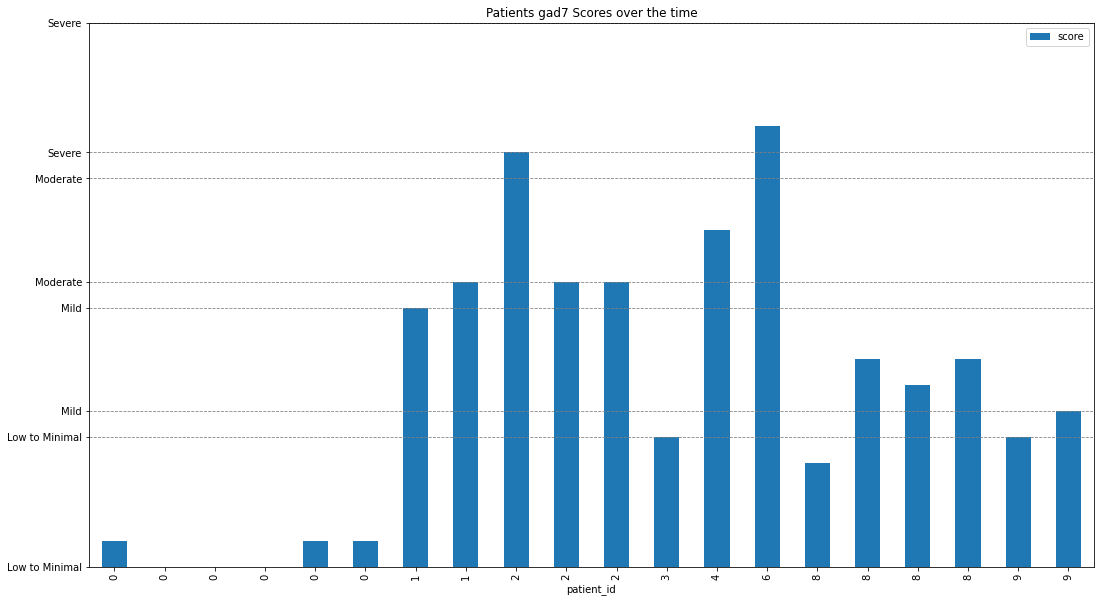

In [65]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
couplePatients.plot(kind = 'bar', x = 'patient_id', y = 'score', ax = ax)
plt.yticks([0,5,6,10,11,15,16,21])
labels = ['Low to Minimal', 'Low to Minimal', 'Mild', 'Mild', 'Moderate', 'Moderate', 'Severe', 'Severe']
ax.set_yticklabels(labels)
ax.yaxis.grid(color = 'gray', linestyle = 'dashed')
plt.title('Patients gad7 Scores over the time')
plt.show()

From the above bar graph we can clearly see the condition of the severity level of 8 patients. As we know a recommended threshold for further clinical evaluation is a score of 10 or greater, patients with ID 1, 2, 4 & 6 are in need of further clinical evaluation.

To make data easier for visualization we can further break dates into month, day, year, hour and minute. This can help us know the number of severity level between patients on certain days, month and time.

In [66]:
gad7_df['date'] = pd.to_datetime(gad7_df['date'])
gad7_df['month'] = gad7_df["date"].dt.month
gad7_df['day'] = gad7_df["date"].dt.day
gad7_df['year'] = gad7_df['date'].dt.year
gad7_df['hour'] = gad7_df['date'].dt.hour
gad7_df['min'] = gad7_df['date'].dt.minute

In [67]:
gad7_df['patient_date_created'] = pd.to_datetime(gad7_df['patient_date_created'])
gad7_df['created_month'] = gad7_df['patient_date_created'].dt.month
gad7_df['created_day'] = gad7_df['patient_date_created'].dt.day
gad7_df['created_year'] = gad7_df['patient_date_created'].dt.year
gad7_df['created_hour'] = gad7_df['patient_date_created'].dt.hour
gad7_df['created_min'] = gad7_df['patient_date_created'].dt.minute

In [73]:
gad7_df.head(20)

,date,patient_id,type,patient_date_created,score,month,day,year,hour,min,created_month,created_day,created_year,created_hour,created_min
21758,2019-12-31 18:35:09.063829,0,gad7,2019-12-04 16:21:58.994188,1,12,31,2019,18,35,12,4,2019,16,21
21759,2020-01-29 19:45:42.206085,0,gad7,2019-12-04 16:21:58.994188,0,1,29,2020,19,45,12,4,2019,16,21
21760,2020-02-26 19:44:31.516123,0,gad7,2019-12-04 16:21:58.994188,0,2,26,2020,19,44,12,4,2019,16,21
21761,2020-03-27 18:25:25.588107,0,gad7,2019-12-04 16:21:58.994188,0,3,27,2020,18,25,12,4,2019,16,21
21762,2020-04-24 18:47:01.412846,0,gad7,2019-12-04 16:21:58.994188,1,4,24,2020,18,47,12,4,2019,16,21
21763,2020-05-22 18:38:29.559676,0,gad7,2019-12-04 16:21:58.994188,1,5,22,2020,18,38,12,4,2019,16,21
31249,2020-04-05 18:08:24.749997,1,gad7,2020-01-21 23:29:16.740718,10,4,5,2020,18,8,1,21,2020,23,29
31250,2020-04-11 05:10:14.684719,1,gad7,2020-01-21 23:29:16.740718,11,4,11,2020,5,10,1,21,2020,23,29
47485,2020-05-10 18:15:16.919307,2,gad7,2020-04-08 17:26:42.952071,16,5,10,2020,18,15,4,8,2020,17,26
47486,2020-06-11 22:57:48.000646,2,gad7,2020-04-08 17:26:42.952071,11,6,11,2020,22,57,4,8,2020,17,26


We can also copy the dataframe and add new column based on the score column such as severity level of patients.

In [69]:
gad7_dfcopy = gad7_df.copy()

In [70]:
#Method to categorize severity level of patients
def severityLevel(x):
    if x >= 0 and x <= 5:
        return 'low to minimal'
    elif x >= 6 and x <= 10:
        return 'mild'
    elif x >= 11 and x <= 15:
        return 'moderate'
    else:
        return 'severe'
    
#new column to hold new data
gad7_dfcopy["severity_level"] = gad7_dfcopy["score"]

#adding the new data
gad7_dfcopy.severity_level = gad7_dfcopy.severity_level.apply(severityLevel)

In [72]:
gad7_dfcopy.head(20)

,date,patient_id,type,patient_date_created,score,month,day,year,hour,min,created_month,created_day,created_year,created_hour,created_min,severity_level
21758,2019-12-31 18:35:09.063829,0,gad7,2019-12-04 16:21:58.994188,1,12,31,2019,18,35,12,4,2019,16,21,low to minimal
21759,2020-01-29 19:45:42.206085,0,gad7,2019-12-04 16:21:58.994188,0,1,29,2020,19,45,12,4,2019,16,21,low to minimal
21760,2020-02-26 19:44:31.516123,0,gad7,2019-12-04 16:21:58.994188,0,2,26,2020,19,44,12,4,2019,16,21,low to minimal
21761,2020-03-27 18:25:25.588107,0,gad7,2019-12-04 16:21:58.994188,0,3,27,2020,18,25,12,4,2019,16,21,low to minimal
21762,2020-04-24 18:47:01.412846,0,gad7,2019-12-04 16:21:58.994188,1,4,24,2020,18,47,12,4,2019,16,21,low to minimal
21763,2020-05-22 18:38:29.559676,0,gad7,2019-12-04 16:21:58.994188,1,5,22,2020,18,38,12,4,2019,16,21,low to minimal
31249,2020-04-05 18:08:24.749997,1,gad7,2020-01-21 23:29:16.740718,10,4,5,2020,18,8,1,21,2020,23,29,mild
31250,2020-04-11 05:10:14.684719,1,gad7,2020-01-21 23:29:16.740718,11,4,11,2020,5,10,1,21,2020,23,29,moderate
47485,2020-05-10 18:15:16.919307,2,gad7,2020-04-08 17:26:42.952071,16,5,10,2020,18,15,4,8,2020,17,26,severe
47486,2020-06-11 22:57:48.000646,2,gad7,2020-04-08 17:26:42.952071,11,6,11,2020,22,57,4,8,2020,17,26,moderate


THE END.